<a href="https://colab.research.google.com/github/pylabview/sales-predicctions/blob/main/DS_Sales_Predicctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Science Sales Predicction
Rodrigo Arguello-Serrano

#Project 1 - Parts 1 & 2

Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, the task is to use Pandas to load in the data and start exploring and cleaning it. Here the steps covered on Part 2:

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

###Data Dictionary 
<table>
  <tr>
    <th>Variable Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Item_Identifier</td>
    <td>Unique product ID</td>
  </tr>
  <tr>
    <td>Item_Weight</td>
    <td>Weight of product</td>
  </tr>
  <tr>
    <td>Item_Fat_Content</td>
    <td>Whether the product is low fat or regular</td>
  </tr>
  <tr>
    <td>Item_Visibility</td>
    <td>The percentage of total display area of all products in a store allocated to the particular product</td>
  </tr>
  <tr>
    <td>Item_Type</td>
    <td>The category to which the product belongs</td>
  </tr>
  <tr>
    <td>Item_MRP</td>
    <td>Maximum Retail Price (list price) of the product</td>
  </tr>
  <tr>
    <td>Outlet_Identifier</td>
    <td>Unique store ID</td>
  </tr> 
  <tr>
    <td>Outlet_Establishment_Year</td>
    <td>The year in which store was established</td>
  </tr> 
  <tr>
    <td>Outlet_Size</td>
    <td>The size of the store in terms of ground area covered</td>
  </tr> 
  <tr>
    <td>Outlet_Location_Type</td>
    <td>The type of area in which the store is located</td>
  </tr> 
  <tr>
    <td>Outlet_Type</td>
    <td>	Whether the outlet is a grocery store or some sort of supermarket</td>
  </tr> 
  <tr>
    <td>Item_Outlet_Sales</td>
    <td>Sales of the product in the particular store. This is the target variable to be predicted.</td>
  </tr> 
</table>

## Module Imports & Mounting Goolgle Drive

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Setting Item_Identifier column as index
df.set_index('Item_Identifier', inplace=True)
#Cheking the head again
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


## Data Cleaning

In [5]:
# 1) How many rows and columns?
num_cols,num_rows = df.shape
print(f"Number of Columns: {num_cols}, Number or rows: {num_rows}")

Number of Columns: 8523, Number or rows: 11


In [6]:
# 2) What are the datatypes of each variable?
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Are there duplicates? If so, drop any duplicates.
dups = df.duplicated().sum()
print(f"Number of duplicates: {dups}")

Number of duplicates: 0


In [8]:
# 4) Identify missing values.
total_missing_series = df.isna().sum()
total_missing_series_idx = df.isna().sum().index
total_cols = len(total_missing_series_idx )

for i in range(total_cols):
  if total_missing_series[i] > 0:
    print(f"Row index {total_missing_series_idx[i]}, number of missing {total_missing_series[i]}")

Row index Item_Weight, number of missing 1463
Row index Outlet_Size, number of missing 2410


In [9]:
# Inputing missing data for Item_Weight with the column average, as the data type is a float
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)

#Dropping Outlet_Size, the misssing values are >5% and this column should not affect the food sales prediction

df.drop(columns=['Outlet_Size'],inplace=True)



In [10]:
# 6) Confirm that there are no missing values after addressing them.
print(f"Are All missing values removed? {df.isna().sum().sum()==0}")

Are All missing values removed? True


In [11]:
# 7) Find and fix any inconsistent categories of data 
## Item_Fat_Content

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
#Repalcing inconsisten values: 'low fat', 'LF', 'reg'
df.replace({'low fat': 'Low Fat',
            'LF': 'Low Fat',
            'reg':'Regular'}, inplace = True)

In [13]:
#Cheking everything is OK!

df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
## Fixing Data Type for Outlet_Establishment_Year from float64 to datetime64

df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'])

In [15]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Project 1 - Part 3

The goal of this third part  is to understand the data as it relates to the products and outlets that play crucial roles in increasing sales. I will complete any statistical analyses that might help you to understand, explain, or model with your data. The following is inckuded:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


## Exploratory Visuals

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [16]:
# Checking info again
df.info()

# Converting back Outlet_Establishment_Year form datetime to int64
df = df.astype({'Outlet_Establishment_Year': 'int'})


<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Weight                8523 non-null   float64       
 1   Item_Fat_Content           8523 non-null   object        
 2   Item_Visibility            8523 non-null   float64       
 3   Item_Type                  8523 non-null   object        
 4   Item_MRP                   8523 non-null   float64       
 5   Outlet_Identifier          8523 non-null   object        
 6   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 7   Outlet_Location_Type       8523 non-null   object        
 8   Outlet_Type                8523 non-null   object        
 9   Item_Outlet_Sales          8523 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 732.4+ KB


<ipython-input-16-acef1667732d>:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df = df.astype({'Outlet_Establishment_Year': 'int'})


- For each numeric feature, we will plot the distribution and a boxplot.

In [17]:
# Helper Function
def print_num_cols(df):
  num_columns = df.select_dtypes('number').columns
  return list(num_columns)

In [18]:
print_num_cols(df)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

## 1. EDA Using Loops

## Column-by-Column EDA using a function (plus markdown interpretations for each)

- Below, I chose to visual all columns:`Item_Outlet_Sales`, `Item_Visibility`, `Item_MRP` and `Item_Weight`.

`Item_MRP`: The retail price is relevant to the sales predition, as it makes it more accessible to all buyers.

`Item_Visibility`: The onsite marketing will include the items the buyers select, helping his sales.

`Item_Outlet_Sales`: include as it is the variable to be predicted.

`Item_Weight`: This feature might not affect the analysis/predition, but I am curious to see if so. 

In [19]:
 # Source : https://github.com/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb

def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

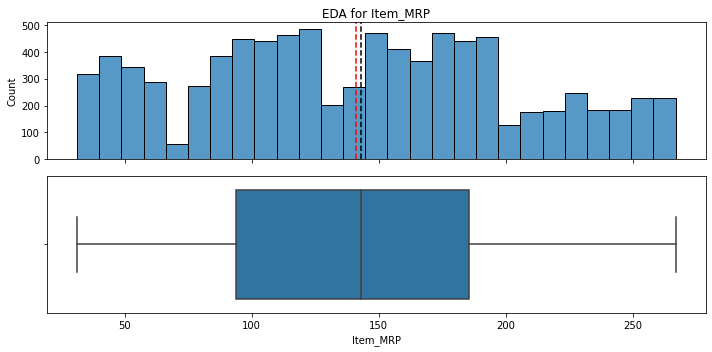

In [20]:
df_no_index = df.reset_index()
plot_numeric(df_no_index,'Item_MRP')

To comment

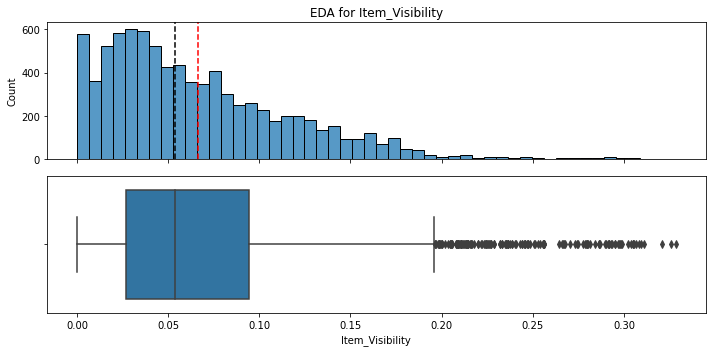

In [21]:
plot_numeric(df_no_index,'Item_Visibility')

Several outliers items with> 20% total display, and I am keeping them as they have a better chance of being sold. The rest is within the 75th percentile

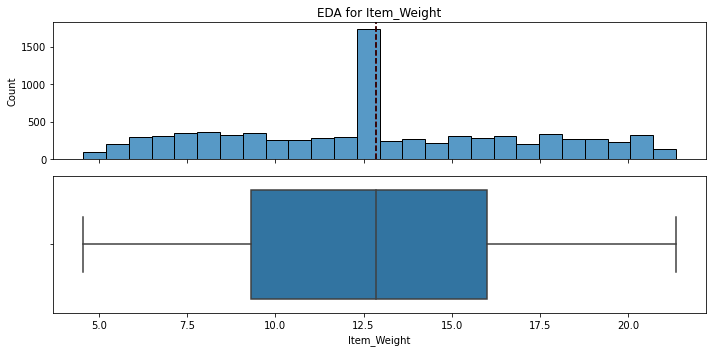

In [22]:
plot_numeric(df_no_index,'Item_Weight')

The mayority weight is ~12.5, there is not outliers

### Visualizing with Barplots
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot. 

In [23]:
## Source : https://github.com/coding-dojo-data-science/Project1_Exemplar/blob/main/DS_Salaries.ipynb
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [24]:
## Helper Funtion
def print_obj_cols(df):
  obj_columns = df.select_dtypes('object').columns
  print(f"""Dataset numeric columns count:
            {list(obj_columns)}""")

In [25]:
print_obj_cols(df)

Dataset numeric columns count:
            ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


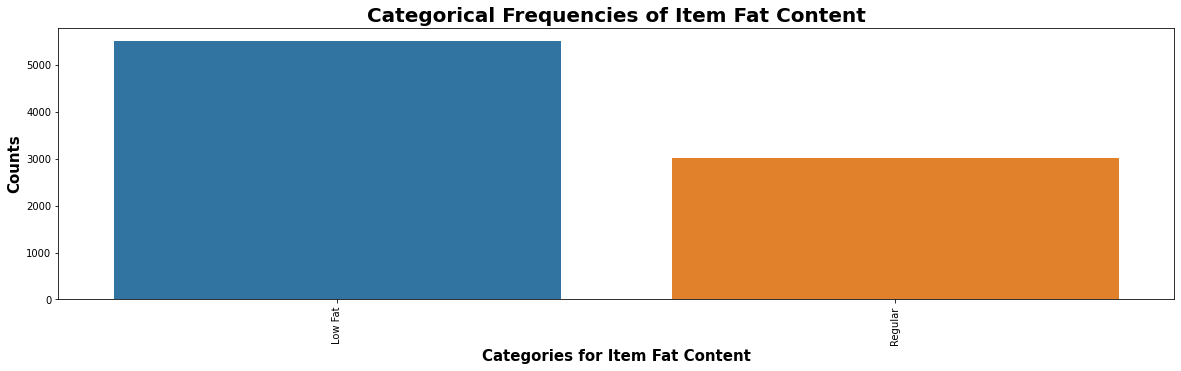

In [26]:
fig, ax = plot_bar(df, 'Item_Fat_Content', 'Item Fat Content');
print(df['Item_Fat_Content'].value_counts())

There are more Low Fat items; it could get a better chance of getting sold

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


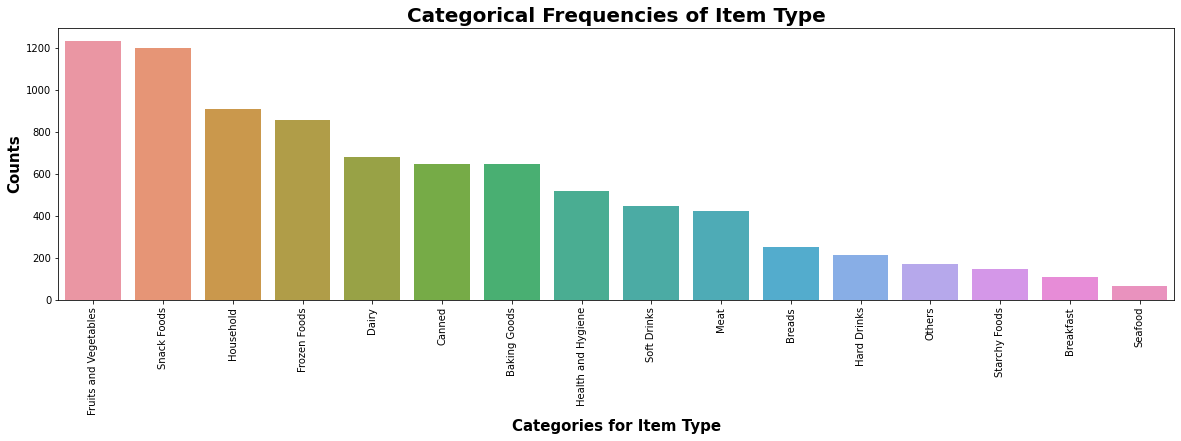

In [27]:
fig, ax = plot_bar(df, 'Item_Type', 'Item Type');
print(df['Item_Type'].value_counts())

Most items are fruits/Veggies & snacks, and Seafood a the fewer ones.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


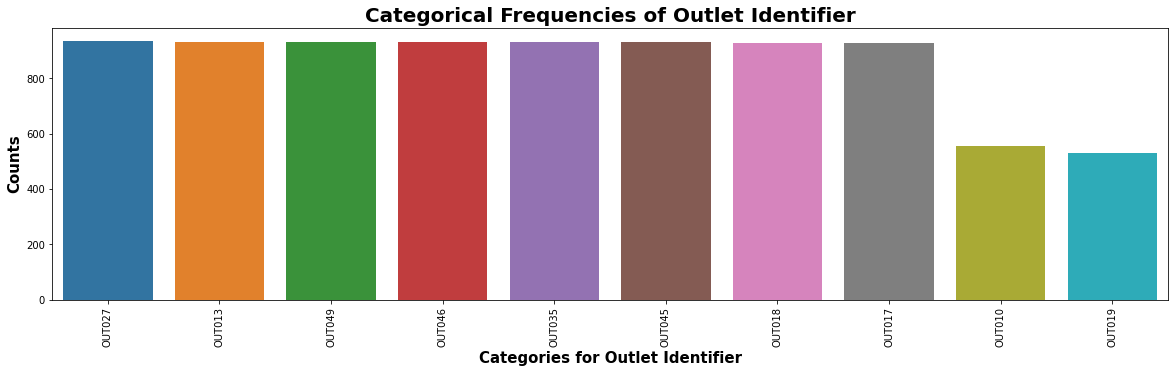

In [28]:
fig, ax = plot_bar(df, 'Outlet_Identifier', 'Outlet Identifier');
print(df['Outlet_Identifier'].value_counts())

Mostly of the stores offers ~900 counts, but 10 and 19

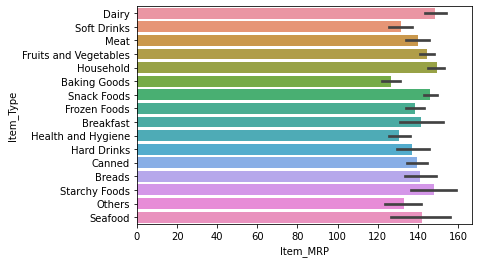

In [29]:
# Barplot with seaborn
sns.barplot(data=df, y='Item_Type', x='Item_MRP');

The MRP is about the same between all items

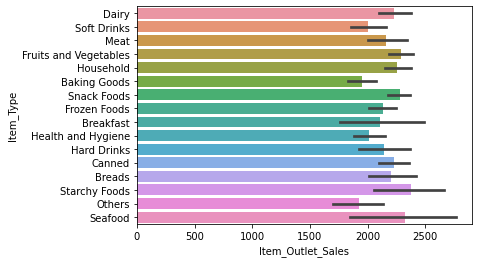

In [30]:
# Barplot with seaborn
sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');

Seafood and Starchy have higher Sales, and baking & Soft has lowest

### EDA for Correlated Features

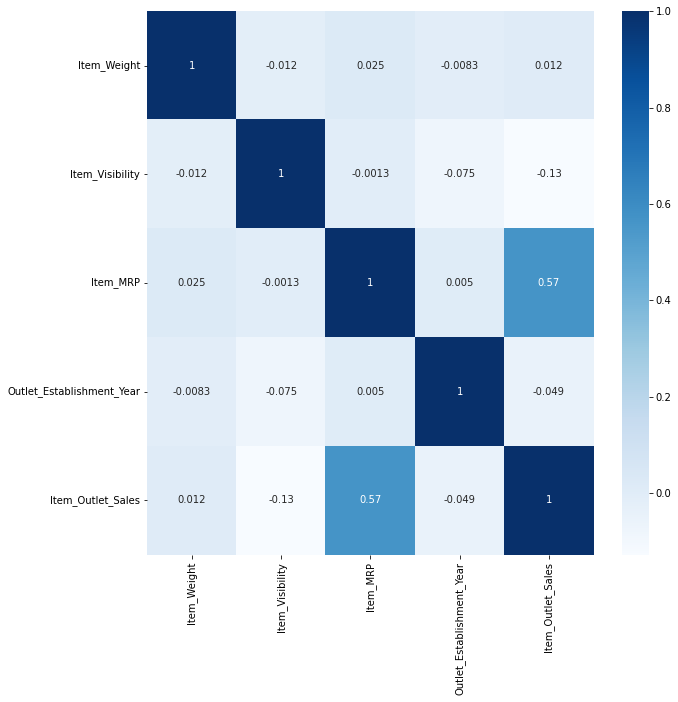

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There is a moderate correlatiom between Item_MRP and Item_Outlet_Sales

# Project 1 - Part 4

## Explanatory Visuals

### Possible Questions to Answer:
  1. Which products sell the most?
  2. Which products sell the most by fat content?
  3. Which products sell the most by visibility?
  4. Which store has better sales?
  5. Which store sells more by establishment year?.
  6. Stores sells by location type

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 990.5+ KB


1.1 Which products sell the most?

In [42]:
Item_means = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Item_means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

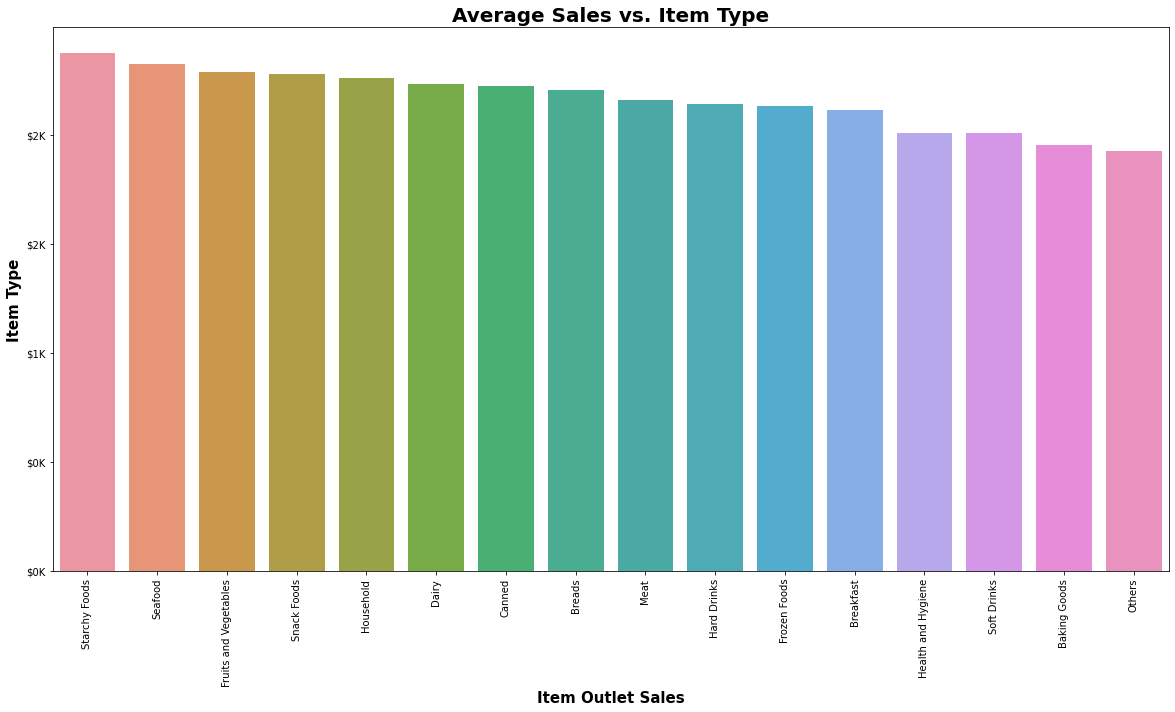

In [50]:

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = Item_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Item Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Type', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

1.2 Which products sell the most by fat content?

In [43]:
Fat_means = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Fat_means

Item_Fat_Content
Regular    2224.561170
Low Fat    2157.711534
Name: Item_Outlet_Sales, dtype: float64

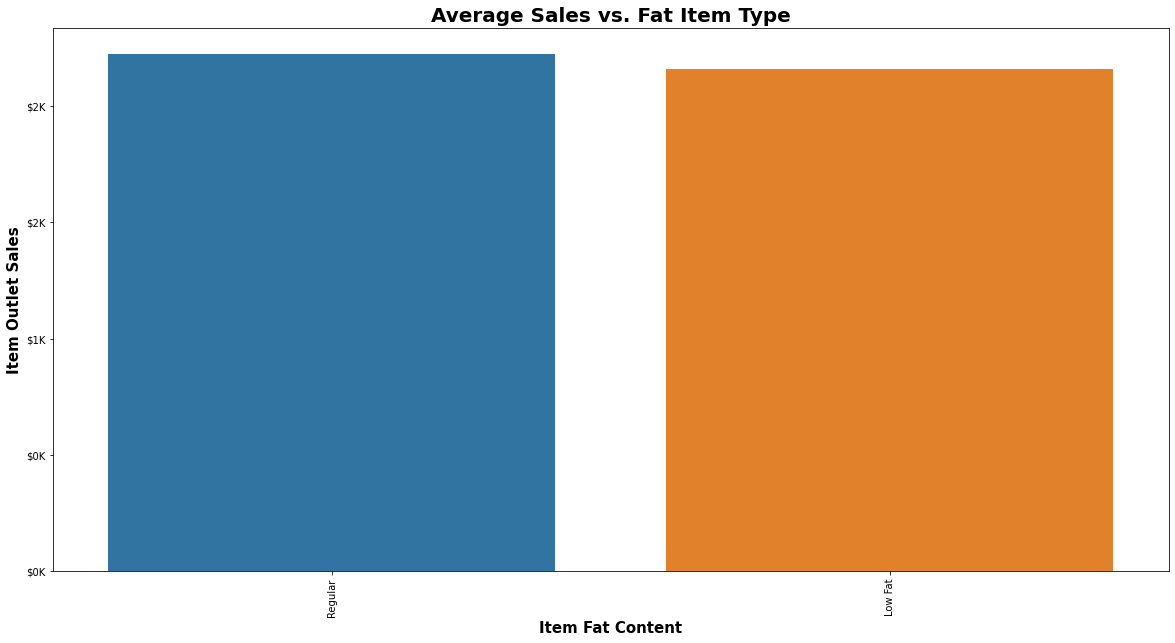

In [53]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Fat_Content', y = 'Item_Outlet_Sales', order = Fat_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Fat Item Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Fat Content', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

1.3 Which products sell the most by visibility?

In [44]:
Vis_means = df.groupby(['Item_Type','Item_Visibility'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Vis_means

Item_Type              Item_Visibility
Household              0.010551           13086.9648
Fruits and Vegetables  0.014296           12117.5600
Snack Foods            0.088840           10993.6896
Canned                 0.030693           10306.5840
Dairy                  0.019495           10256.6490
                                             ...    
Frozen Foods           0.024546              36.6190
Breads                 0.281510              35.2874
Health and Hygiene     0.073077              34.6216
Snack Foods            0.134328              33.9558
Household              0.064411              33.2900
Name: Item_Outlet_Sales, Length: 8006, dtype: float64

1.4 Which store has better sales?

In [54]:
store_means = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
store_means

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

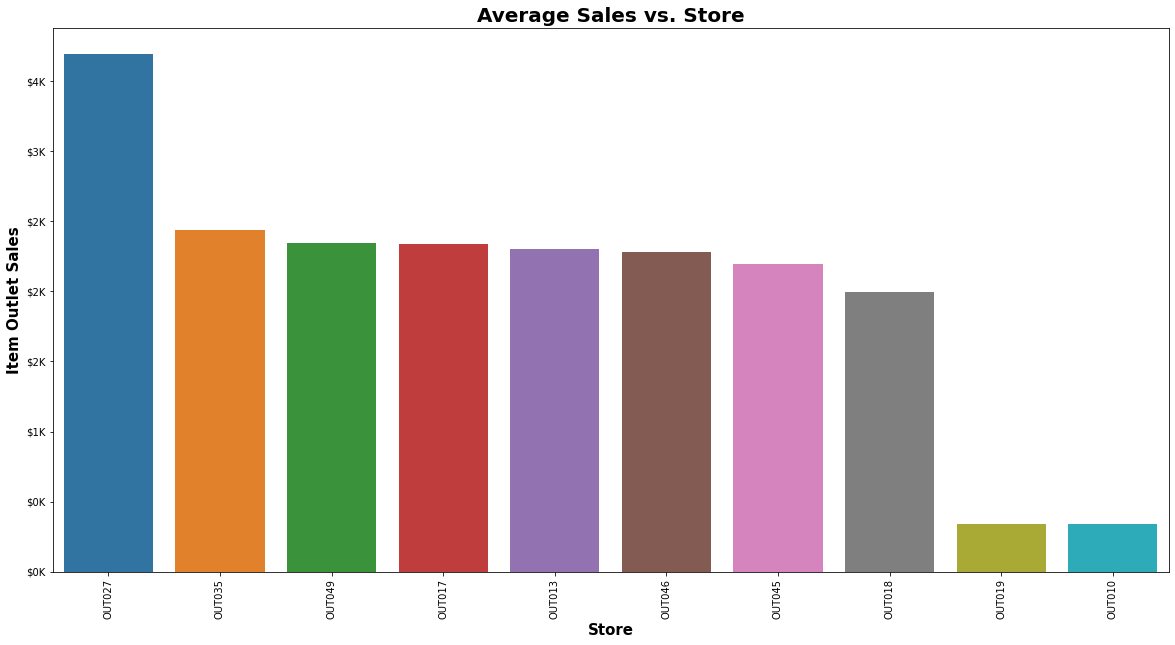

In [55]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Identifier', y = 'Item_Outlet_Sales', order = store_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales vs. Store', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Store', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

1.5 Which store sells more by establishment year?

In [46]:
Store_means = df.groupby(['Outlet_Identifier','Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Store_means

Outlet_Identifier  Outlet_Establishment_Year
OUT027             1985                         3694.038558
OUT035             2004                         2438.841866
OUT049             1999                         2348.354635
OUT017             2007                         2340.675263
OUT013             1987                         2298.995256
OUT046             1997                         2277.844267
OUT045             2002                         2192.384798
OUT018             2009                         1995.498739
OUT019             1985                          340.329723
OUT010             1998                          339.351662
Name: Item_Outlet_Sales, dtype: float64

1.6 Stores sells by location type

In [48]:
Store_ID_Location_means = df.groupby(['Outlet_Identifier','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Store_ID_Location_means 

Outlet_Identifier  Outlet_Location_Type
OUT027             Tier 3                  3694.038558
OUT035             Tier 2                  2438.841866
OUT049             Tier 1                  2348.354635
OUT017             Tier 2                  2340.675263
OUT013             Tier 3                  2298.995256
OUT046             Tier 1                  2277.844267
OUT045             Tier 2                  2192.384798
OUT018             Tier 3                  1995.498739
OUT019             Tier 1                   340.329723
OUT010             Tier 3                   339.351662
Name: Item_Outlet_Sales, dtype: float64